# Naive Bias Classifier

Bayes Theorem
H=> hypothesis
E=> Evidence
P(H) => probability of hypothsis before getting Evidence
P(H|E)=>  probability of hypothsis after getting Evidence

P(H|E)=P(E|H)*P(H)/P(E)

    P(A|B) => Probability of A given B
    P(A|B) = P(AnB)/P(B)
    P(B|A) = P(BnA)/P(A)

    P(AnB) => P(A|B)*P(A) =P(B|A)*P(B)
        => P(A|B) = P(B|A)*P(B)/P(A)
 
P(H) => Prior probablity
P(H|E) => Posterior probability
P(E|H) => Likelihood
        

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv('sentiment.csv')
df.head()

,Phrase,label
0,Spider-man is better than any summer blockbust...,Positive
1,of good sense,Positive
2,", then knock yourself out and enjoy the big sc...",Negative
3,So could young romantics out on a date .,Positive
4,humour,Positive


In [62]:
df.columns

Index(['Phrase', 'label'], dtype='object')

###### Update Column Lable with Positive=1 and Negetive = 0

In [63]:
df['label']=df['label'].replace({'Positive':1,'Negative':0})

In [64]:
df['label'].value_counts()

1    1800
0    1000
Name: label, dtype: int64

# Normaization

In [65]:
class_priors=df['label'].value_counts(normalize=True).to_dict()
class_priors

class_pos = class_priors[0]
class_neg = class_priors[1]
print(class_pos)
print(class_neg)

0.35714285714285715
0.6428571428571429


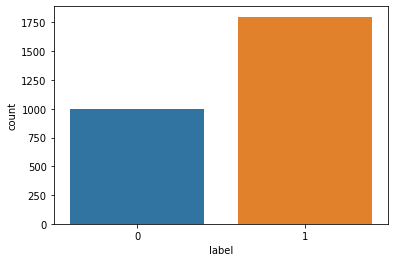

In [66]:
sns.countplot(x="label", data=df)

# Create Vocabulary

In [67]:
word_list=[]
for sentence in df['Phrase']:
    word_list.extend(sentence.lower().split())
    
    
#Create vocabulary with uniq words
vocab=set(word_list)
len(vocab)
# print(vocab)

1891

### Split Data set

In [68]:
train_df=df.loc[:0.8*len(df)]
test_df=df.loc[0.8*len(df):]

In [69]:
test_df['label'].value_counts()

1    347
0    213
Name: label, dtype: int64

In [70]:
word_probs={
    0:{},
    1:{}
    
}

In [71]:
test_priors = test_df['label'].value_counts(normalize = True).to_dict()
test_priors

{1: 0.6196428571428572, 0: 0.38035714285714284}

In [72]:
class_0_words =[]
class_1_words = []

for sentence in df[df['label'] == 0]['Phrase']:
    class_0_words.extend(sentence.lower().split())

for sentence in df[df['label'] == 1]['Phrase']:
    class_1_words.extend(sentence.lower().split())

In [73]:
y=df['label'].values

In [74]:
y

array([1, 1, 0, ..., 1, 0, 1])

In [75]:
class_0_words =[]
class_1_words = []
def prob_of_words(df):
    word_probs = {
    0: {},
    1: {}
    }

    for sentence in df[df['label'] == 0]['Phrase']:
        class_0_words.extend(sentence.lower().split())

    for sentence in df[df['label'] == 1]['Phrase']:
        class_1_words.extend(sentence.lower().split())

    #implementing laplace smoothing
    for word in vocab:
        n_word_in_0 = len([c for c in class_0_words if c == word])
        total_words_in_0 = len(class_0_words)
        word_probs[0][word] = (n_word_in_0 + 1)/(total_words_in_0 + len(vocab))

        n_word_in_1 = len([c for c in class_1_words if c == word])
        total_words_in_1 = len(class_1_words)
        word_probs[1][word] = (n_word_in_1 + 1)/(total_words_in_1 +len(vocab))
    return word_probs

In [76]:
probs=prob_of_words(test_df)

# Testing

In [77]:
prob=1
prediction=[]
for i in range(len(test_df)):
    words=[]
    sent=test_df.iloc[i][0]
    words=sent.lower().split()

    for cnt in range(len(words)):
        word=str(words[cnt])
        print(word)
        neg_prob=prob*probs[0][word]
    print(neg_prob)
    
    for cnt in range(len(words)):
        word=str(words[cnt])
        print(word)
        pos_prob=prob*probs[1][word]
    print(pos_prob)
    
    if np.dot(class_pos,pos_prob)>=np.dot(class_neg,neg_prob):
        prediction.append(1)
    else:
        prediction.append(0)

smoke
signals
0.00027925160569673273
smoke
signals
0.00042799058420714745
run-of-the-mill
0.0008377548170901983
run-of-the-mill
0.00021399529210357372
waste
0.001117006422786931
waste
0.00021399529210357372
of
a
story
that
's
a
lot
richer
than
the
ones
hollywood
action
screenwriters
usually
come
up
with
on
their
own
0.0013962580284836638
of
a
story
that
's
a
lot
richer
than
the
ones
hollywood
action
screenwriters
usually
come
up
with
on
their
own
0.0017119623368285898
intrigue
0.00027925160569673273
intrigue
0.00042799058420714745
they
do
n't
fit
well
together
0.0005585032113934655
they
do
n't
fit
well
together
0.00021399529210357372
entertains
not
so
much
0.0016755096341803965
entertains
not
so
much
0.0008559811684142949
joy
0.00027925160569673273
joy
0.0006419858763107211
hampered
--
no
,
paralyzed
--
by
a
self-indulgent
script
...
0.001954761239877129
hampered
--
no
,
paralyzed
--
by
a
self-indulgent
script
...
0.0012839717526214422
wiseman
's
warmest
0.00027925160569673273
wiseman


0.0010699764605178687
a
self-indulgent
script
0.002234012845573862
a
self-indulgent
script
0.00021399529210357372
written
,
flatly
,
by
david
kendall
and
directed
,
barely
,
by
there
's
something
about
mary
co-writer
ed
decter
.
0.009773806199385646
written
,
flatly
,
by
david
kendall
and
directed
,
barely
,
by
there
's
something
about
mary
co-writer
ed
decter
.
0.01155574577359298
generous
and
deep
0.00027925160569673273
generous
and
deep
0.0008559811684142949
splendor
0.00027925160569673273
splendor
0.0008559811684142949
more
sophisticated
and
literate
than
such
pictures
usually
are
...
an
amusing
little
catch
0.00027925160569673273
more
sophisticated
and
literate
than
such
pictures
usually
are
...
an
amusing
little
catch
0.0008559811684142949
beautifully
0.00027925160569673273
beautifully
0.0008559811684142949
dragons
0.0005585032113934655
dragons
0.00042799058420714745
gives
her
best
performance
since
abel
ferrara
had
her
beaten
to
a
pulp
in
his
dangerous
game
.
0.00977380619938564

woo
bullet
ballet
.
0.009773806199385646
stylized
with
a
touch
of
john
woo
bullet
ballet
.
0.01155574577359298
that
attracts
the
young
and
fit
0.0005585032113934655
that
attracts
the
young
and
fit
0.00042799058420714745
emotionally
scattered
film
0.0027925160569673277
emotionally
scattered
film
0.004279905842071475
stooping
0.0005585032113934655
stooping
0.00042799058420714745
its
courage
,
0.01815135437028763
its
courage
,
0.02482345388401455
it
's
hard
to
say
who
might
enjoy
this
0.001117006422786931
it
's
hard
to
say
who
might
enjoy
this
0.0010699764605178687
emphasizes
the
q
in
quirky
,
with
mixed
results
.
0.009773806199385646
emphasizes
the
q
in
quirky
,
with
mixed
results
.
0.01155574577359298
start
to
drag
as
soon
as
the
action
speeds
up
0.0030717676626640603
start
to
drag
as
soon
as
the
action
speeds
up
0.0012839717526214422
than
to
employ
hollywood
kids
and
people
who
owe
0.00027925160569673273
than
to
employ
hollywood
kids
and
people
who
owe
0.00042799058420714745
self-indul

offbeat
humor
,
amusing
characters
0.00027925160569673273
offbeat
humor
,
amusing
characters
0.0019259576289321636
tartakovsky
's
team
has
some
freakish
powers
of
visual
charm
,
but
the
five
writers
slip
into
the
modern
rut
of
narrative
banality
.
0.009773806199385646
tartakovsky
's
team
has
some
freakish
powers
of
visual
charm
,
but
the
five
writers
slip
into
the
modern
rut
of
narrative
banality
.
0.01155574577359298
to
make
a
big
splash
0.00027925160569673273
to
make
a
big
splash
0.0010699764605178687
revelatory
0.00027925160569673273
revelatory
0.0006419858763107211
a
war-ravaged
land
0.0005585032113934655
a
war-ravaged
land
0.00042799058420714745
sharp
movie
0.003909522479754258
sharp
movie
0.0021399529210357373
difficult
but
worthy
film
0.0027925160569673277
difficult
but
worthy
film
0.004279905842071475
a
thoughtful
what-if
for
the
heart
as
well
as
the
mind
0.00027925160569673273
a
thoughtful
what-if
for
the
heart
as
well
as
the
mind
0.00042799058420714745
a
perfectly
entertainin

In [78]:
len(prediction)

560

In [81]:
tp=fp=fn=tn=0
for i in range(len(prediction)):
    if (prediction[i]==1 and test_df.iloc[i][1]==1):
        tp+=1
    elif (prediction[i]==1 and test_df.iloc[i][1]==0):
        fp+=1
    elif (prediction[i]==0 and test_df.iloc[i][0]==1):
        fn+=1
    else:
        tn+=1

print('True Positive: {}\nFalse Positive: {}\nFalse Negative: {}\nTrue Negative: {}'.format(tp,fp,fn,tn))

True Positive: 174
False Positive: 10
False Negative: 0
True Negative: 376


In [90]:
print('\t\tConfusion Matrix\n')
print('\t\tActual Value')
print(' \tPositive\tNegative')
print('+ \t{}\t\t{}'.format(tp,fp))
print('- \t{}\t\t{}'.format(fn,tn))

		Confusion Matrix

		Actual Value
 	Positive	Negative
+ 	174		10
- 	0		376


In [91]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1=(2*precision*recall)/(precision+recall)
accuracy=(tp+tn)/(len(test_df))
specificity=tn/(tn+fp)
print('Precision\t: {}\nRecall\t\t: {}\nF1\t\t: {}\nAccuracy\t: {}'.format(precision,recall,f1,accuracy))

Precision	: 0.9456521739130435
Recall		: 1.0
F1		: 0.9720670391061452
Accuracy	: 0.9821428571428571
